<a href="https://colab.research.google.com/github/sousaawesley/K-Means-Algoritmo-/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Essa classe implementa o algoritmo K-Means, que é um algoritmo de clustering utilizado em machine learning e mineração de dados.
O objetivo do algoritmo é agrupar um conjunto de pontos em K grupos, onde K é um número pré-definido pelo usuário.

A classe possui os seguintes métodos estáticos:

1. **set_cores(Num_de_cores):** define o número de cores que serão utilizadas para colorir os pontos nos gráficos gerados.

2. **criar_pontos(K):** gera aleatoriamente K pontos dentro de um plano de tamanho fixo, e retorna uma lista contendo esses pontos.

3. **mostrar_grafico(centroides, pontos):** plota um gráfico com os pontos e os centroides passados como argumento.

4. **mostrar_grafico_set(centroides, pontos_dos_centroides):** plota um gráfico com os pontos de cada centróide passados como argumento, além de mostrar a posição dos centroides.

5. **centroides_mais_proximos(centroides, pontos):** retorna uma lista de listas, onde cada lista contém os pontos que pertencem a um determinado centróide.

6. **recalcular_centroides(centroides, pontos_dos_centroides):** recalcula a posição dos centroides com base na média das posições dos pontos que pertencem a cada centróide.

In [46]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from math import dist

TAMANHO_PLANO = 30

class K_Means:
  
  cores = []
  @staticmethod
  def set_cores(Num_de_cores):
    K_Means.cores = [[random.uniform(0, 1) for _ in range(3)] for _ in range(Num_de_cores)]
  @staticmethod
  def criar_pontos(K):
    lista = [] 
    try:
     for x, y in zip(random.sample(range(0,TAMANHO_PLANO), K), random.sample(range(0,TAMANHO_PLANO), K)):
        lista.append(list((x,y)))
    except:
      print("Entrada inválida")
    return lista

  @staticmethod
  def mostrar_grafico(centroides, pontos): 
      plt.figure(figsize=(10, 10))
      centroides_x = []
      centroides_y = []
      pontos_x = []
      pontos_y = []
      
      centroides_x = [c[0] for c in centroides]
      centroides_y = [c[1] for c in centroides]

      for i, j in pontos:
        pontos_x.append(i)
        pontos_y.append(j)

      plt.scatter(pontos_x, pontos_y, color='blue')
      plt.scatter(centroides_x, centroides_y, color='black', marker='x', s=100)

      plt.title("K_Means")
      plt.xlabel("Eixo X")
      plt.ylabel("Eixo Y")

      plt.show()

  @staticmethod
  def mostrar_grafico_set(centroides, pontos_dos_centroides):
    plt.figure(figsize=(10, 10))

    centroides_x = [c[0] for c in centroides]
    centroides_y = [c[1] for c in centroides]
    cord_para_centroide_x = [0, 0]
    cord_para_centroide_y = [0, 0]

    for i, pontos_do_centroide in enumerate(pontos_dos_centroides):
      cord_para_centroide_x[0], cord_para_centroide_y[0] =  centroides[i]
      cor = K_Means.cores[i % len(K_Means.cores)]
      for ponto in pontos_do_centroide:
        pontos_x, pontos_y = ponto
        cord_para_centroide_x[1], cord_para_centroide_y[1] =  ponto
        cord_para_centroide_x[1], cord_para_centroide_y[1] =  ponto
        
        plt.plot(cord_para_centroide_x, cord_para_centroide_y, color=cor)
        plt.scatter(pontos_x, pontos_y, color=cor)

    plt.scatter(centroides_x, centroides_y, color='black', marker='x', s=100)

    plt.title("K_Means")
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    
    plt.show()

  @staticmethod
  def centroides_mais_proximos(centroides, pontos):
    pontos_dos_centroides = [[] for _ in centroides]
    for ponto in pontos:
      distancia_minima  = float('inf')
      
      for i, centroide in enumerate(centroides):
        if dist(centroide, ponto) < distancia_minima:
          distancia_minima  = dist(centroide, ponto)
          pos_centroide = i
      pontos_dos_centroides[pos_centroide].append(ponto)
    
    return pontos_dos_centroides

  @staticmethod
  def recalcular_centroides(centroides, pontos_dos_centroides):
      for i, pontos_do_centroide in enumerate(pontos_dos_centroides):
          soma_de_x = 0
          soma_de_y = 0
          if len(pontos_do_centroide) != 0:
              for ponto in pontos_do_centroide:
                  x, y = ponto 
                  soma_de_x += x
                  soma_de_y += y
              media_de_x = soma_de_x/len(pontos_do_centroide)
              media_de_y = soma_de_y/len(pontos_do_centroide)
              centroides[i] = [media_de_x, media_de_y]
      return centroides


#Este código cria um exemplo para a classe K_Means e demonstra seu funcionamento.

Primeiro, define-se se usará um exemplo de dataset (data_set_exemplo) ou se criará um novo conjunto de centroides e pontos aleatórios.

Em seguida, são definidos o número de centroides **(Núm_de_centroides)** e o número de pontos **(Núm_de_pontos)** que serão usados no exemplo.

Cria-se então uma instância da classe K_Means e se chama o método **set_cores()** para definir as cores dos centroides. Essas cores são geradas aleatoriamente e armazenadas em um atributo da classe.

Em seguida, são criados dois conjuntos de pontos: os centroides e os pontos a serem classificados. Os dois são gerados aleatoriamente, a partir da chamada do método criar_pontos().

Caso data_set_exemplo seja True, a variável centroides e pontos são substituídas por um conjunto pré-definido de valores.

Por fim, o exemplo é exibido usando o método mostrar_grafico(), que plota um gráfico dos centroides e pontos de dados no plano cartesiano.

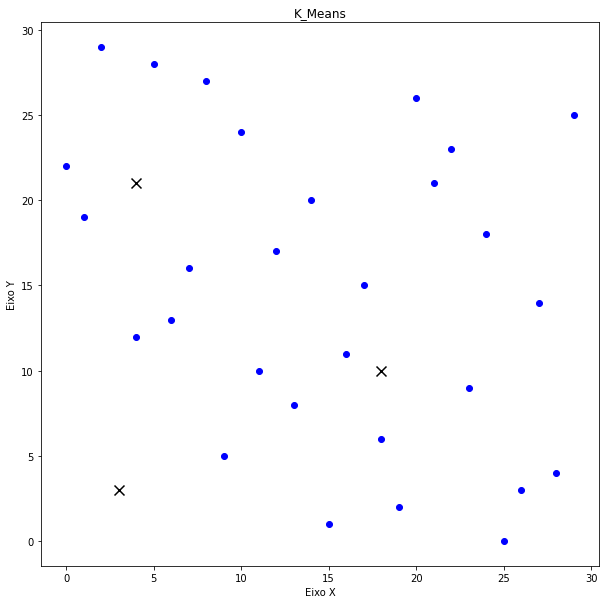

In [47]:
data_set_exemplo = False
Núm_de_centroides = 3
Núm_de_pontos = 29

K_Means.set_cores(Núm_de_centroides)
centroides = K_Means.criar_pontos(Núm_de_centroides)
pontos = K_Means.criar_pontos(Núm_de_pontos)

if(data_set_exemplo):
  centroides =[[2, 10], [5, 8], [1, 2]]
  pontos = [[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]]

K_Means.mostrar_grafico(centroides, pontos)

#Este código executa o algoritmo de K-Means para encontrar os grupos mais próximos em um conjunto de pontos.

O primeiro loop while é executado indefinidamente até que os centroides não mudem mais. A cada iteração, os pontos mais próximos de cada centroide são encontrados e os centroides são recalculados como a média desses pontos. Se os centroides não mudarem mais, o algoritmo interrompe a execução.

O segundo loop for é executado duas vezes para melhorar o resultado final. Isso ocorre porque o algoritmo K-Means pode acabar preso em um mínimo local, o que pode levar a um resultado insatisfatório.

Por fim, a função mostrar_grafico_set é chamada para mostrar um gráfico com os grupos encontrados.

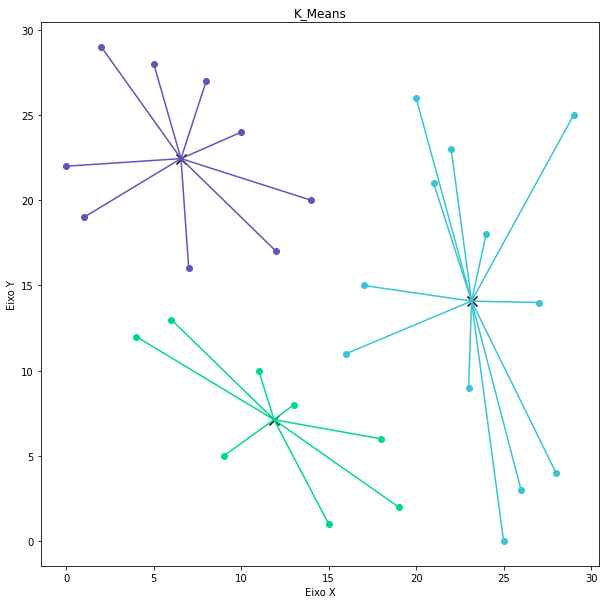

In [48]:
while(True):

  centroides_anteriores = centroides
  pontos_dos_centroides = K_Means.centroides_mais_proximos(centroides, pontos)
  centroides = K_Means.recalcular_centroides(centroides, pontos_dos_centroides)
  
  if centroides_anteriores == centroides: 
    for _ in range(2):
      centroides_anteriores = centroides
      pontos_dos_centroides = K_Means.centroides_mais_proximos(centroides, pontos)
      centroides = K_Means.recalcular_centroides(centroides, pontos_dos_centroides)
    
    K_Means.mostrar_grafico_set(centroides, pontos_dos_centroides)
    break